In [ ]:
! pip install biopython


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\khush\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Gene Annotation Information:
Gene name: BRCA1
Description: BRCA1 DNA repair associated
Chromosome: Not available
Protein Product: Not available
Gene Symbol: BRCA1
Aliases: ['IRIS', 'PSCP', 'BRCAI', 'BRCC1', 'FANCS', 'PNCA4', 'RNF53', 'BROVCA1', 'PPP1R53']
Gene Type:Not available
Genomic Location: Not available
Genomic Location: {'Seq-interval': {'Seq-interval_from': '43044294', 'Seq-interval_to': '43170326', 'Seq-interval_strand': {'Na-strand': StringElement('', attributes={'value': 'minus'})}, 'Seq-interval_id': {'Seq-id': {'Seq-id_gi': '568815581'}}}}


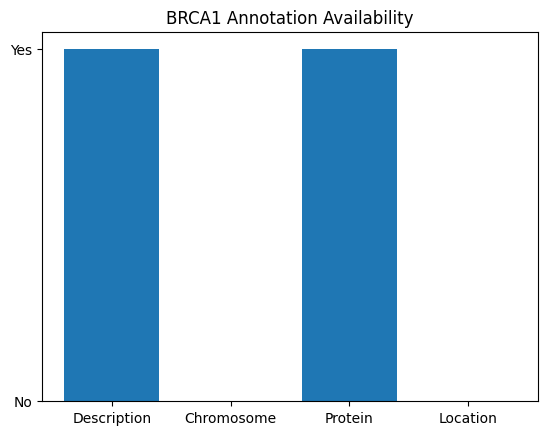

In [ ]:
import matplotlib.pyplot as plt 
from Bio import Entrez
Entrez.email = "khushidriven@gmail.com"

# Step1: Enter gene name 
gene_name=input("Enter the name of gene: ")

# Step2: Search NCBI gene database 
handle = Entrez.esearch(db="gene", term=f"{gene_name}[Gene Name] AND Homo sapiens[Organism]")
record = Entrez.read(handle)
handle.close()

if record["IdList"]:
    gene_id=record["IdList"][0]
    
    
#Step3: Gene Details 
    handle=Entrez.efetch(db="gene", id=gene_id, rettype='xml')
    records=Entrez.read(handle)
    handle.close()

    gene_info=records[0]

    print("Gene Annotation Information:")
    print(f"Gene name: {gene_name}")

# Description of gene
    try: 
        description = gene_info["Entrezgene_gene"]["Gene-ref"]["Gene-ref_desc"]
    except:
        description = "Not available"
    print(f"Description: {description}")


# Chromosome 
    try:
        chromosome = gene_info['Entrezgene_source']['BioSource']['SubSource'][0]['SubSource_name']
    except:
        chromosome = "Not available"
    print(f"Chromosome: {chromosome}")


# Protein product 
    try: 
        products= gene_info['Entrezgene_locus'][0]['Gene-commentary_products']
        protein_name= products[0]['Gene-commentary_text']
        print(f"Protein Product: {protein_name}")
    except:
        print("Protein Product: Not available")
        
# Gene Symbol 
    try:
        gene_symbol=gene_info['Entrezgene_gene']['Gene-ref']['Gene-ref_locus']
    except:
        gene_symbol="Not available"
    print(f"Gene Symbol: {gene_symbol}")
    
# Aliases
    try:
        aliases=gene_info['Entrezgene_gene']['Gene-ref']['Gene-ref_syn']
    except:
        aliases="Not available"
    print(f"Aliases: {aliases}")
    

# Gene type
    try:
        gene_type=gene_info['Entrezgene_type']['value']
    except:
        gene_type="Not available"
    print(f"Gene Type:{gene_type}")
    

# Genomic location
    try:
        genomic_location= gene_info['Entrezgene_locus'][0]['Gene-commentary_seqs'][0]['Seq-loc_int']
        start= genomic_location['Seq-interval_from']
        end= genomic_location['Seq-interval_to']
        print(f"Genomic location:{start}-{end}")
    except:
        print("Genomic Location: Not available")
    print(f"Genomic Location: {genomic_location}")
 
else:
    print("Gene not found in NCBI")
    





        








